In [19]:
import os
# import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Activation, Dropout, GlobalAveragePooling2D,MaxPooling3D
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, applications
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from tensorflow import keras
from keras import backend as K 

In [20]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    "/Users/sravanthi/Desktop/Ascent_PoC_Image_Classifcation/output/train",
    class_mode='binary',
    target_size=(224,224))

validation_datagen = ImageDataGenerator()

validation_generator = validation_datagen.flow_from_directory(
    "/Users/sravanthi/Desktop/Ascent_PoC_Image_Classifcation/output/val",
    shuffle=False,
    class_mode='binary',
    target_size=(224,224))

test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    "/Users/sravanthi/Desktop/Ascent_PoC_Image_Classifcation/output/test", # Put your path here
     target_size=(224, 224),
    shuffle=False)

Found 34 images belonging to 2 classes.
Found 5 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [21]:
img_width, img_height = 224, 224

if K.image_data_format() == 'channels_first': 
    input_shape = (3, img_width, img_height) 
else: 
    input_shape = (img_width, img_height, 3) 

In [22]:
vgg = VGG16(include_top=False, weights='imagenet',input_shape=(224,224,3))
for layer in vgg.layers:
  layer.trainable = False
x = vgg.output
# x = conv_base.output

x = GlobalAveragePooling2D()(x)
x = Dense(256,  activation='relu')(x)
x= Dropout(rate = 0.45)(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(vgg.input, predictions)

In [23]:
# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [24]:
import datetime
currentDT1= datetime.datetime.now()
print (str(currentDT1))
history_resnet = model.fit_generator(generator=train_generator,  
                              epochs=10,
                              validation_data=validation_generator,
                              
                             )
import datetime
currentDT2= datetime.datetime.now()
print (str(currentDT2))
print (str(currentDT2-currentDT1))

2020-11-30 07:37:34.036832
Epoch 1/10
2/2 [==============================] - 1s 339ms/step - loss: 3.7388 - accuracy: 0.4412 - val_loss: 4.3331 - val_accuracy: 0.4000
Epoch 2/10
2/2 [==============================] - 0s 249ms/step - loss: 2.0831 - accuracy: 0.5882 - val_loss: 1.9149 - val_accuracy: 0.6000
Epoch 3/10
2/2 [==============================] - 0s 239ms/step - loss: 0.7786 - accuracy: 0.6765 - val_loss: 0.2469 - val_accuracy: 0.8000
Epoch 4/10
2/2 [==============================] - 3s 1s/step - loss: 0.4595 - accuracy: 0.7941 - val_loss: 0.1335 - val_accuracy: 1.0000
Epoch 5/10
2/2 [==============================] - 1s 281ms/step - loss: 1.1607 - accuracy: 0.7941 - val_loss: 0.0631 - val_accuracy: 1.0000
Epoch 6/10
2/2 [==============================] - 1s 282ms/step - loss: 0.5597 - accuracy: 0.8235 - val_loss: 0.1649 - val_accuracy: 0.8000
Epoch 7/10
2/2 [==============================] - 1s 286ms/step - loss: 0.3623 - accuracy: 0.7941 - val_loss: 1.1554 - val_accuracy: 0.8

Accuracy 60.0
Confusion Matrix
[[2 3]
 [1 4]]
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.57      0.80      0.67         5

    accuracy                           0.60        10
   macro avg       0.62      0.60      0.58        10
weighted avg       0.62      0.60      0.58        10



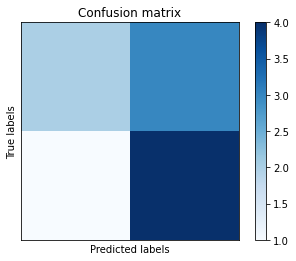

In [25]:
import sklearn.metrics as metrics

test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)
Y_pred = model.predict_generator(test_data_generator)
y_pred = Y_pred >= 0.5

scores = metrics.accuracy_score(test_data_generator.classes, y_pred)*100
print("Accuracy", scores)
print('Confusion Matrix')
cm = metrics.confusion_matrix(test_data_generator.classes, y_pred)
print(cm)
print('Classification Report')
print(metrics.classification_report(test_data_generator.classes, y_pred))

import matplotlib.pyplot as plt
import numpy as np
cm = metrics.confusion_matrix(test_data_generator.classes, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix')
plt.colorbar()
plt.show()

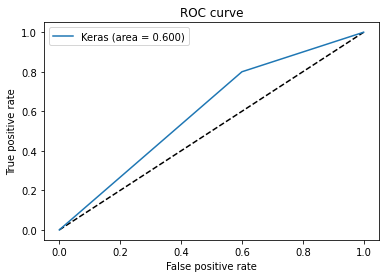

In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_data_generator.classes, y_pred)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

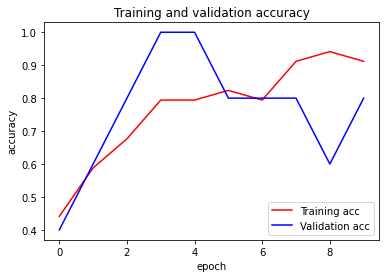

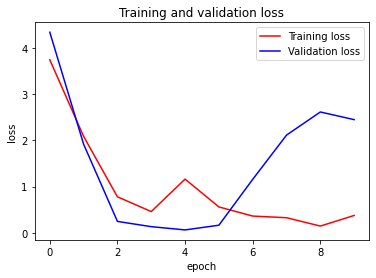

In [27]:
acc = history_resnet.history['accuracy']
val_acc = history_resnet.history["val_accuracy"]
loss = history_resnet.history["loss"]
val_loss = history_resnet.history["val_loss"]
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()
